In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

In [2]:

# データの読み込み
data = pd.read_excel('data.xlsx',header = 1)

# ミネラルデータの抽出
minerals = ['Al', 'Ca', 'Cu', 'Fe', 'K', 'Mg', 'Mn', 'Na', 'Zn']
X = data[minerals]
X

,Al,Ca,Cu,Fe,K,Mg,Mn,Na,Zn
0,3.297,4.356,0.031290,0.067,99.06,3.531,1.455,0.541,0.131
1,4.267,4.118,0.031290,0.079,106.50,3.378,1.542,0.603,0.126
2,4.088,4.763,0.033370,0.084,114.00,4.763,1.838,1.058,0.156
3,4.338,4.556,0.033370,0.091,122.60,5.005,2.269,0.958,0.162
4,4.732,5.138,0.035514,0.110,132.40,5.626,2.998,1.510,0.165
...,...,...,...,...,...,...,...,...,...
163,16.690,8.895,0.153000,0.236,323.40,20.450,10.420,6.360,0.335
164,17.620,8.909,0.177000,0.261,334.20,23.486,11.330,7.133,0.351
165,17.920,9.056,0.180000,0.266,332.30,22.840,11.290,7.609,0.358
166,17.820,9.128,0.175000,0.273,367.30,24.560,12.110,8.537,0.372


In [3]:
# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCAの実行
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)


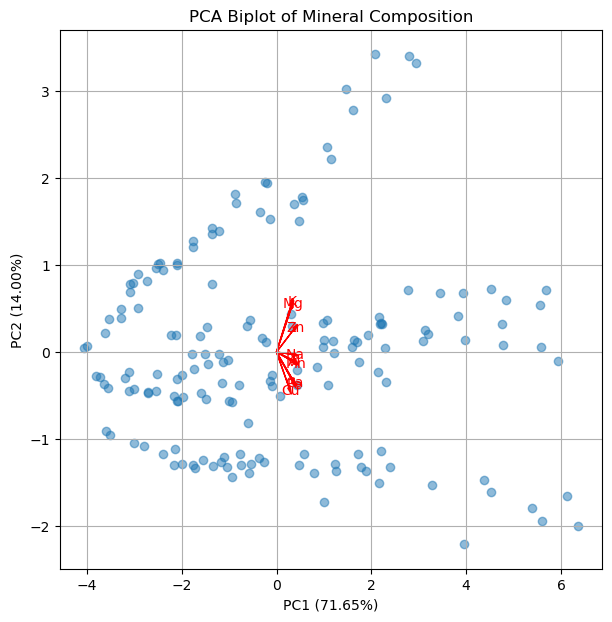

In [6]:
# PCAバイプロットの作成
plt.figure(figsize=(7, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)

# 各ミネラルのベクトルをプロット
for i, mineral in enumerate(minerals):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color='r', head_width=0.05, head_length=0.1)
    plt.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, 
             mineral, color='r', ha='center', va='center')

# 軸のラベルとタイトル
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA Biplot of Mineral Composition')
plt.grid()

plt.show()

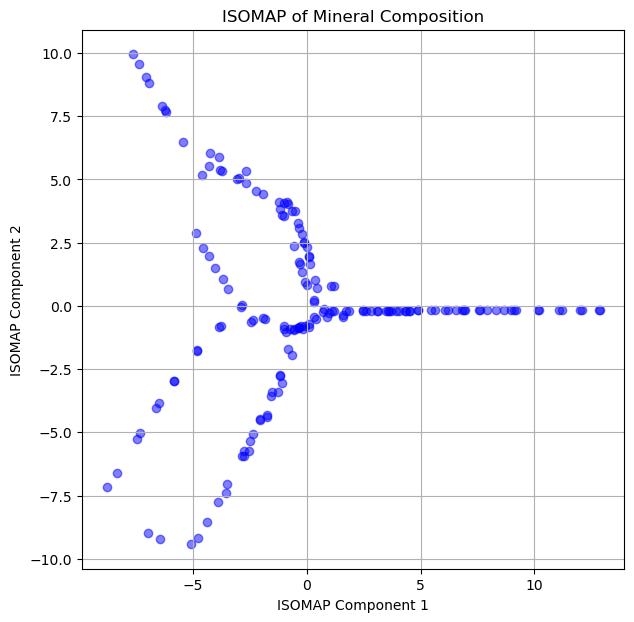

In [10]:
# ISOMAPの実行
isomap = Isomap(n_neighbors=5, n_components=2, metric='euclidean')
isomap_components = isomap.fit_transform(X_scaled)

# ISOMAPの結果をプロット
plt.figure(figsize=(7, 7))
plt.scatter(isomap_components[:, 0], isomap_components[:, 1], alpha=0.5, c='blue')

# 軸のラベルとタイトル
plt.xlabel('ISOMAP Component 1')
plt.ylabel('ISOMAP Component 2')
plt.title('ISOMAP of Mineral Composition')
plt.grid()

plt.show()

In [12]:

from scipy.cluster.hierarchy import linkage, dendrogram

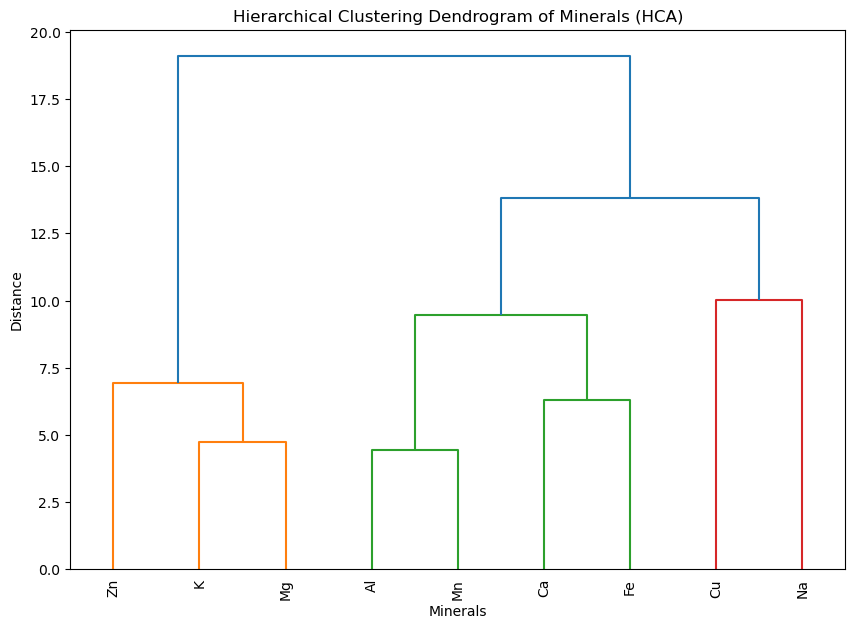

In [13]:
# 行列を転置して、ミネラルの相互関係を分析する
X_scaled_T = X_scaled.T

# 階層的クラスター分析 (HCA) の実行
# linkage関数を使用して「Ward」法と「ユークリッド」距離でクラスタリング
Z = linkage(X_scaled_T, method='ward', metric='euclidean')

# 樹状図（デンドログラム）の作成
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=minerals, leaf_rotation=90, leaf_font_size=10)

# タイトルと軸のラベルを設定
plt.title('Hierarchical Clustering Dendrogram of Minerals (HCA)')
plt.xlabel('Minerals')
plt.ylabel('Distance')

plt.show()

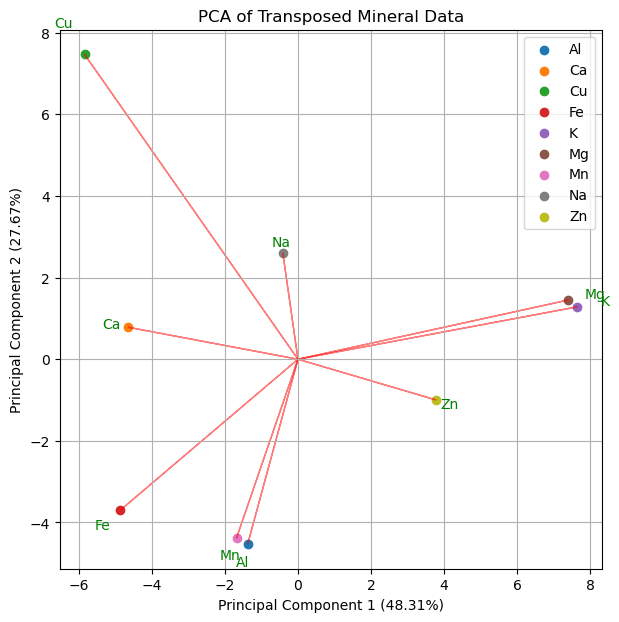

In [16]:
# 主成分分析 (PCA) の実行
pca = PCA(n_components=2)  # 最初の2つの主成分を抽出
principal_components = pca.fit_transform(X_scaled_T)

# バイプロットの作成
plt.figure(figsize=(7, 7))

# 各ミネラルのプロット
for i, mineral in enumerate(minerals):
    plt.scatter(principal_components[i, 0], principal_components[i, 1], label=mineral)

# 主成分軸の矢印を描画
for i, (x, y) in enumerate(principal_components):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x * 1.1, y * 1.1, minerals[i], color='g', ha='center', va='center')

# タイトルと軸のラベルを設定
plt.title('PCA of Transposed Mineral Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

plt.grid()
plt.legend()
plt.show()